<a href="https://colab.research.google.com/github/RileyWClarke/BiancoGroup/blob/master/cvps20_biophysics_assignment_rclarke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CVPS20 // Assignment 2**

assigned : **Sep 12, 2020**

DUE : **Sep 22, 2020 11:59pm**

## Assessing Optic Nerve Degeneration

<img src="https://visioneyeinstitute.com.au/wp-content/uploads/optic-atrophy.jpg" width=400x>

---

In this assignment you will be using techniques from image processing and computer vision (in particular, by making extensive use of the `scipy.ndimage.measurements` [library](https://docs.scipy.org/doc/scipy/reference/ndimage.html#measurements)) to quantify the degeneration of optic nerves in humans due to Leber Hereditary Optic Neuropathy (LHON) .  The biophysics and biology of nerves in the human eye and the impact of LHON on those is described in detail in [Carelliab, Ross-Cisnerosa, & Saduna (2004)](https://www.sciencedirect.com/science/article/pii/S1350946203000764?casa_token=ijeNAqJM500AAAAA:Ipd_Mhq9YSiv3ZqtRwYgztcc24gtQKpwAcb2_EE8B_LNO19HiSXU9EJeF0euIykRYAGDd3g).  This assignment does not require detailed understanding of the biophysics of the eye, but rather will focus on extracting information from images of both healthy and LHON-affected human optical nerves that have been used to inform understanding of LHON progression in humans.

<b>

Rules for homeworks:

1. You may work with other students in the class, but if you do, each student with whom you worked <u>must</u> be listed in this notebook in the first cell below.  Direct copying from someone else's notebook is not permitted.

2. All solutions and outputs must be derived with python and the notebook should be "runable" by me (top to bottom) without errors.

3. Late homeworks will assess a 15% late penalty up to 3 days after the due date and a 50% late penalty until the end of the term (see CVPS20 syllabus).

</b>

<u>**Instructions for tasks that will be graded are in bold below.**</u>

---

**Please list the names of the other students with whom you worked for this assignment (if none, put "None").**

**Mount your Google Drive to this notebook, load, and display the `axons_eye.jpg` image from the `data/examples/` directory within `cvps20`.**

In [5]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.ndimage.measurements as snm
from skimage.filters import threshold_otsu

plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gist_gray"

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
imgname = '/content/gdrive/My Drive/cvps20/data/examples/axons_eye.jpg'

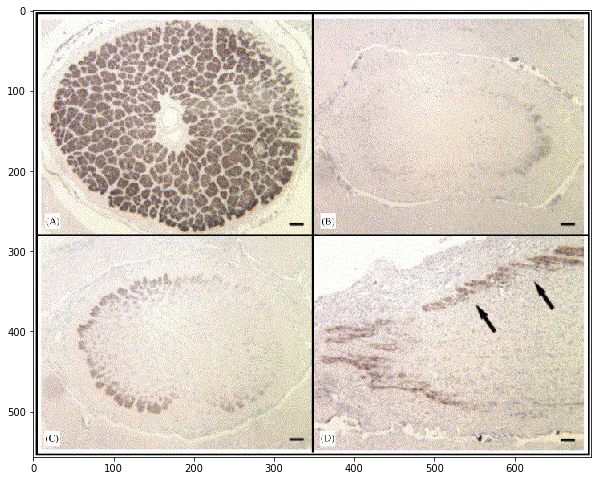

In [6]:
import matplotlib.image as mpimg

img = mpimg.imread(imgname) / 255.

imgplot = plt.imshow(img)

In [38]:
r, g, b = img.transpose(2, 0, 1)

**Count the number of axons in panel (A) of the image using thresholding and connected-component labeling.**

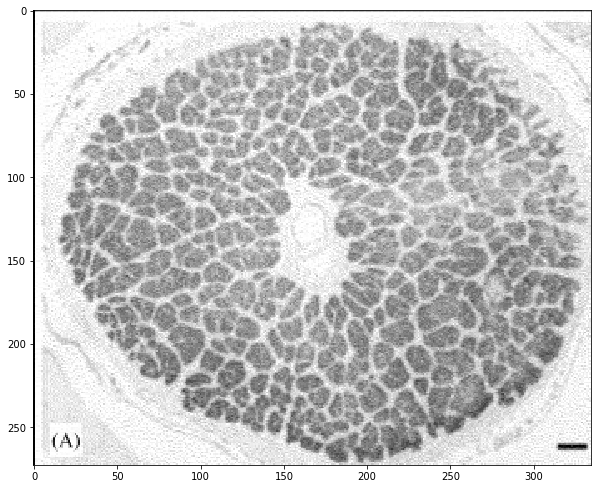

In [40]:
a_r = r[5:278,5:340]
plt.imshow(a_r)

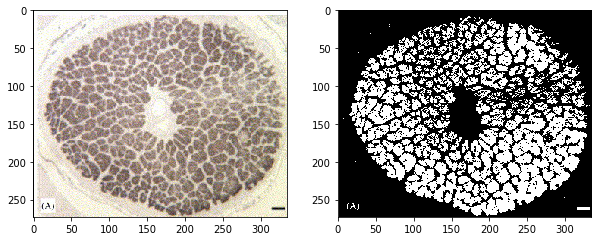

In [9]:
fig, ax = plt.subplots(1,2)

othr = threshold_otsu(r)

ax[0].imshow(img[5:278,5:340])
ax[1].imshow(a_r < othr)

In [10]:
a_rth = a_r < othr
labs, nlabs = snm.label(a_rth)
print(nlabs)

654


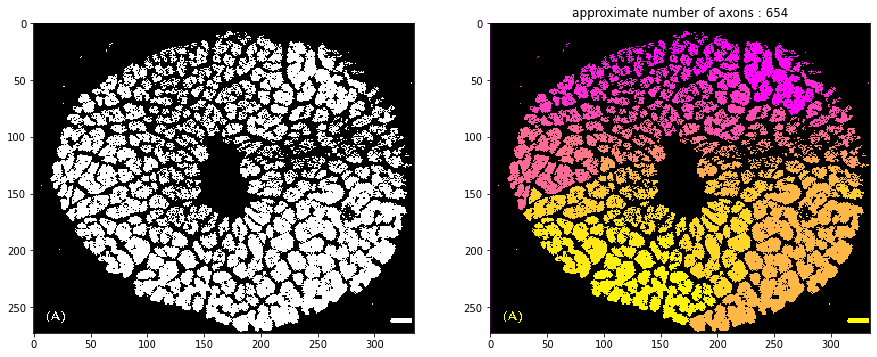

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

ax[0].imshow(a_rth)
ax[1].imshow(labs, cmap="spring", alpha=a_rth.astype(float))

ax[1].set_facecolor("black")

ax[1].set_title("approximate number of axons : {0}".format(nlabs))

fig.show()

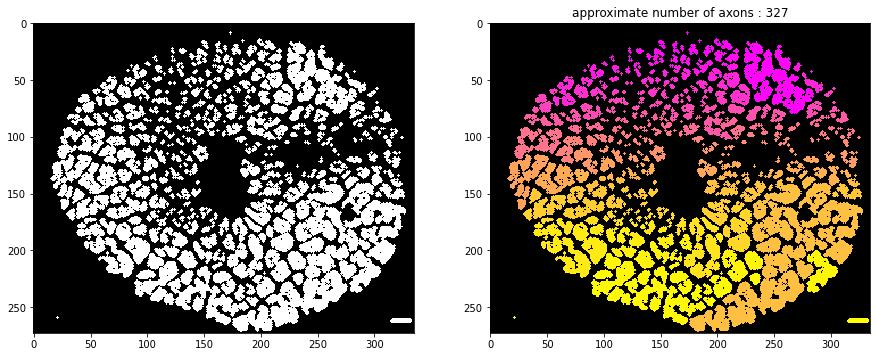

In [33]:
from scipy.ndimage.morphology import binary_erosion, binary_dilation, binary_closing

a_rth = a_r < othr

a_rth = binary_erosion(a_rth, iterations=1)
a_rth = binary_dilation(a_rth, iterations=1)

labs, nlabs = snm.label(a_rth)

fig, ax = plt.subplots(1, 2, figsize=(15, 10))

ax[0].imshow(a_rth)
ax[1].imshow(labs, cmap="spring", alpha=a_rth.astype(float))

ax[1].set_facecolor("black")

ax[1].set_title("approximate number of axons : {0}".format(nlabs))

fig.show()

Number of axons ~ 327 (-2 from the labels) ~ 325

**Count the number of axons in panel (C) of the image using thresholding and connected-component labeling.**

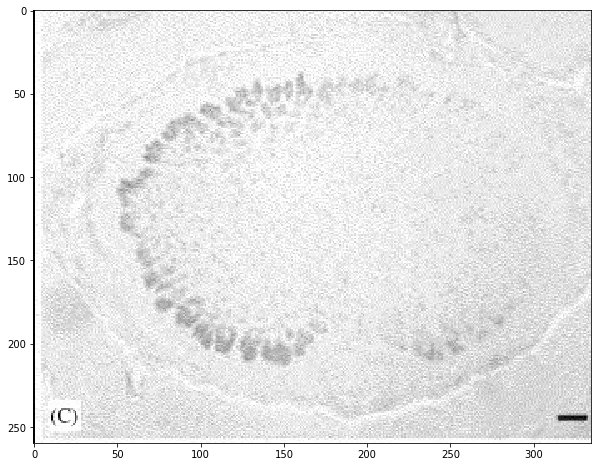

In [69]:
c_r = r[290:550,5:340]
plt.imshow(c_r)

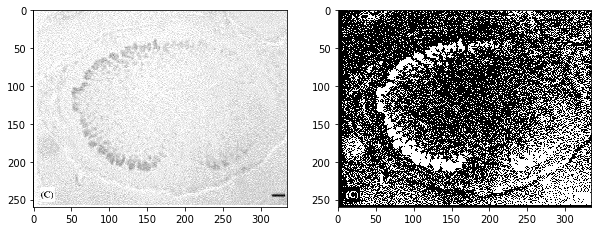

In [111]:
fig, ax = plt.subplots(1,2)

othr = threshold_otsu(c_r) 

ax[0].imshow(c_r)
ax[1].imshow(c_r < othr);

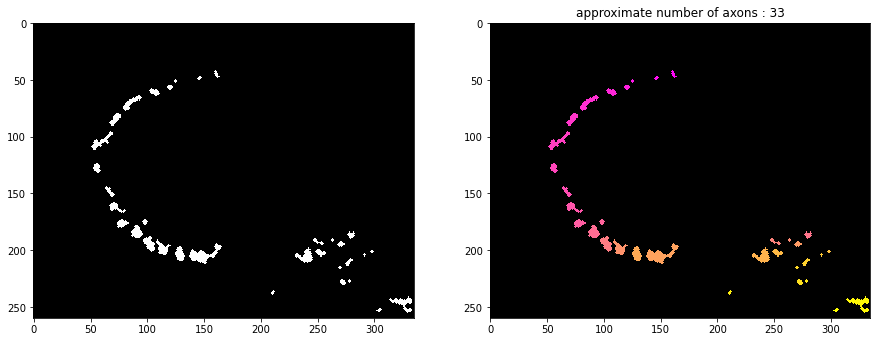

In [113]:
c_rth = c_r < othr

c_rth = binary_erosion(c_rth, iterations=3)
c_rth = binary_dilation(c_rth, iterations=1)

labs, nlabs = snm.label(c_rth)

fig, ax = plt.subplots(1, 2, figsize=(15, 10))

ax[0].imshow(c_rth)
ax[1].imshow(labs, cmap="spring", alpha=c_rth.astype(float))

ax[1].set_facecolor("black")

ax[1].set_title("approximate number of axons : {0}".format(nlabs))

fig.show()

Number of axons ~ 33 (-3 from the labels) ~ 30

**Calculate the size for each axon$^{\dagger}$ in panels (A) and (C) and make a histogram of individual axon areas in panel (A) and a similar histogram for the axons in panel (C).  The areas should be measured in square-microns given that the black bar in each panel is 100 microns.**

<small> $^{\dagger}$ calculate the size for each axon using functions from the `scipy.ndimage.measurements` [library](https://docs.scipy.org/doc/scipy/reference/ndimage.html#measurements). </small>

**Plot a histogram of the radial distance (in microns) of the axons from the "center" of the eye in panel (A) and a similar histogram for the axons in panel (C).**